In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Global plot settings
plt.rcParams['figure.dpi'] = 150   # Set the resolution of the plots to 150 DPI
plt.style.use('fivethirtyeight')

In [21]:
filepath = '/workspaces/bakery_prediction/0_DataPreparation/Processed/04_featured_data_with_weather_variables.csv'
df_sales = pd.read_csv(filepath , encoding='utf-8')


df_sales.head()

,id,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,Woche,Monat,Wochentag,Feiertag,Ferien,sunny,cloudy,rainy,thunderstorm
0,1307011,2013-07-01,1,148.828353,0,6,17.8375,15,cloudy,27,7,1,0,0,0,1,0,0
1,1307012,2013-07-01,2,535.856285,0,6,17.8375,15,cloudy,27,7,1,0,0,0,1,0,0
2,1307013,2013-07-01,3,201.198426,0,6,17.8375,15,cloudy,27,7,1,0,0,0,1,0,0
3,1307014,2013-07-01,4,65.890169,0,6,17.8375,15,cloudy,27,7,1,0,0,0,1,0,0
4,1307015,2013-07-01,5,317.475875,0,6,17.8375,15,cloudy,27,7,1,0,0,0,1,0,0


In [22]:
# making a copy of the dataframe
df = df_sales.copy()

#drop unneeded columns
not_required_columns = ['Woche', 'Monat', 'Wochentag','sunny','cloudy','rainy','thunderstorm']
                        
df.drop(columns = not_required_columns,inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11418 entries, 0 to 11417
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   11418 non-null  int64  
 1   Datum                11418 non-null  object 
 2   Warengruppe          11418 non-null  int64  
 3   Umsatz               9521 non-null   float64
 4   KielerWoche          11418 non-null  int64  
 5   Bewoelkung           11418 non-null  int64  
 6   Temperatur           11418 non-null  float64
 7   Windgeschwindigkeit  11418 non-null  int64  
 8   Wettercode           11418 non-null  object 
 9   Feiertag             11418 non-null  int64  
 10  Ferien               11418 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 981.4+ KB


In [23]:
df["Datum"] = pd.to_datetime(df["Datum"], errors="coerce", format="%Y-%m-%d")

# other time intelligence columns on the sales Table
df["Year"] = df["Datum"].dt.year                   # year column
df["Month_Num"] = df["Datum"].dt.month                 # month column (number)
df["Month_Name"] = df["Datum"].dt.month_name()           # month name
df["Weekday_Num"] = df["Datum"].dt.weekday               # weekday Code
df["Weekday"] = df["Datum"].dt.day_name()              # Weekday Name 


df.head()

,id,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,Feiertag,Ferien,Year,Month_Num,Month_Name,Weekday_Num,Weekday
0,1307011,2013-07-01,1,148.828353,0,6,17.8375,15,cloudy,0,0,2013,7,July,0,Monday
1,1307012,2013-07-01,2,535.856285,0,6,17.8375,15,cloudy,0,0,2013,7,July,0,Monday
2,1307013,2013-07-01,3,201.198426,0,6,17.8375,15,cloudy,0,0,2013,7,July,0,Monday
3,1307014,2013-07-01,4,65.890169,0,6,17.8375,15,cloudy,0,0,2013,7,July,0,Monday
4,1307015,2013-07-01,5,317.475875,0,6,17.8375,15,cloudy,0,0,2013,7,July,0,Monday


### Creating Product Table and Merging

In [24]:
products = {
   "Warengruppe": [1, 2, 3, 4, 5,6],
   "Product_Name": ["Bread (Brot)", "Roles (Brötchen)", "Croissant", "Pastry (Konditorei)", "Cakes (Kuchen)","Seasonal Products (Saison Brot)"],
}


product_table = pd.DataFrame(products)

In [25]:
df = df.merge(product_table, on='Warengruppe')

## Total Sales by Product Categories

Total sales by product cat

In [26]:
# Total sales across all product categories

sales_by_product = df.groupby(['Warengruppe','Product_Name'])['Umsatz'].sum().reset_index()   # aggregation
sales_by_product = sales_by_product.sort_values(by='Umsatz', ascending=False)  # sorting
sales_by_product['Umsatz'] = sales_by_product['Umsatz']/1000             # converting to thousands

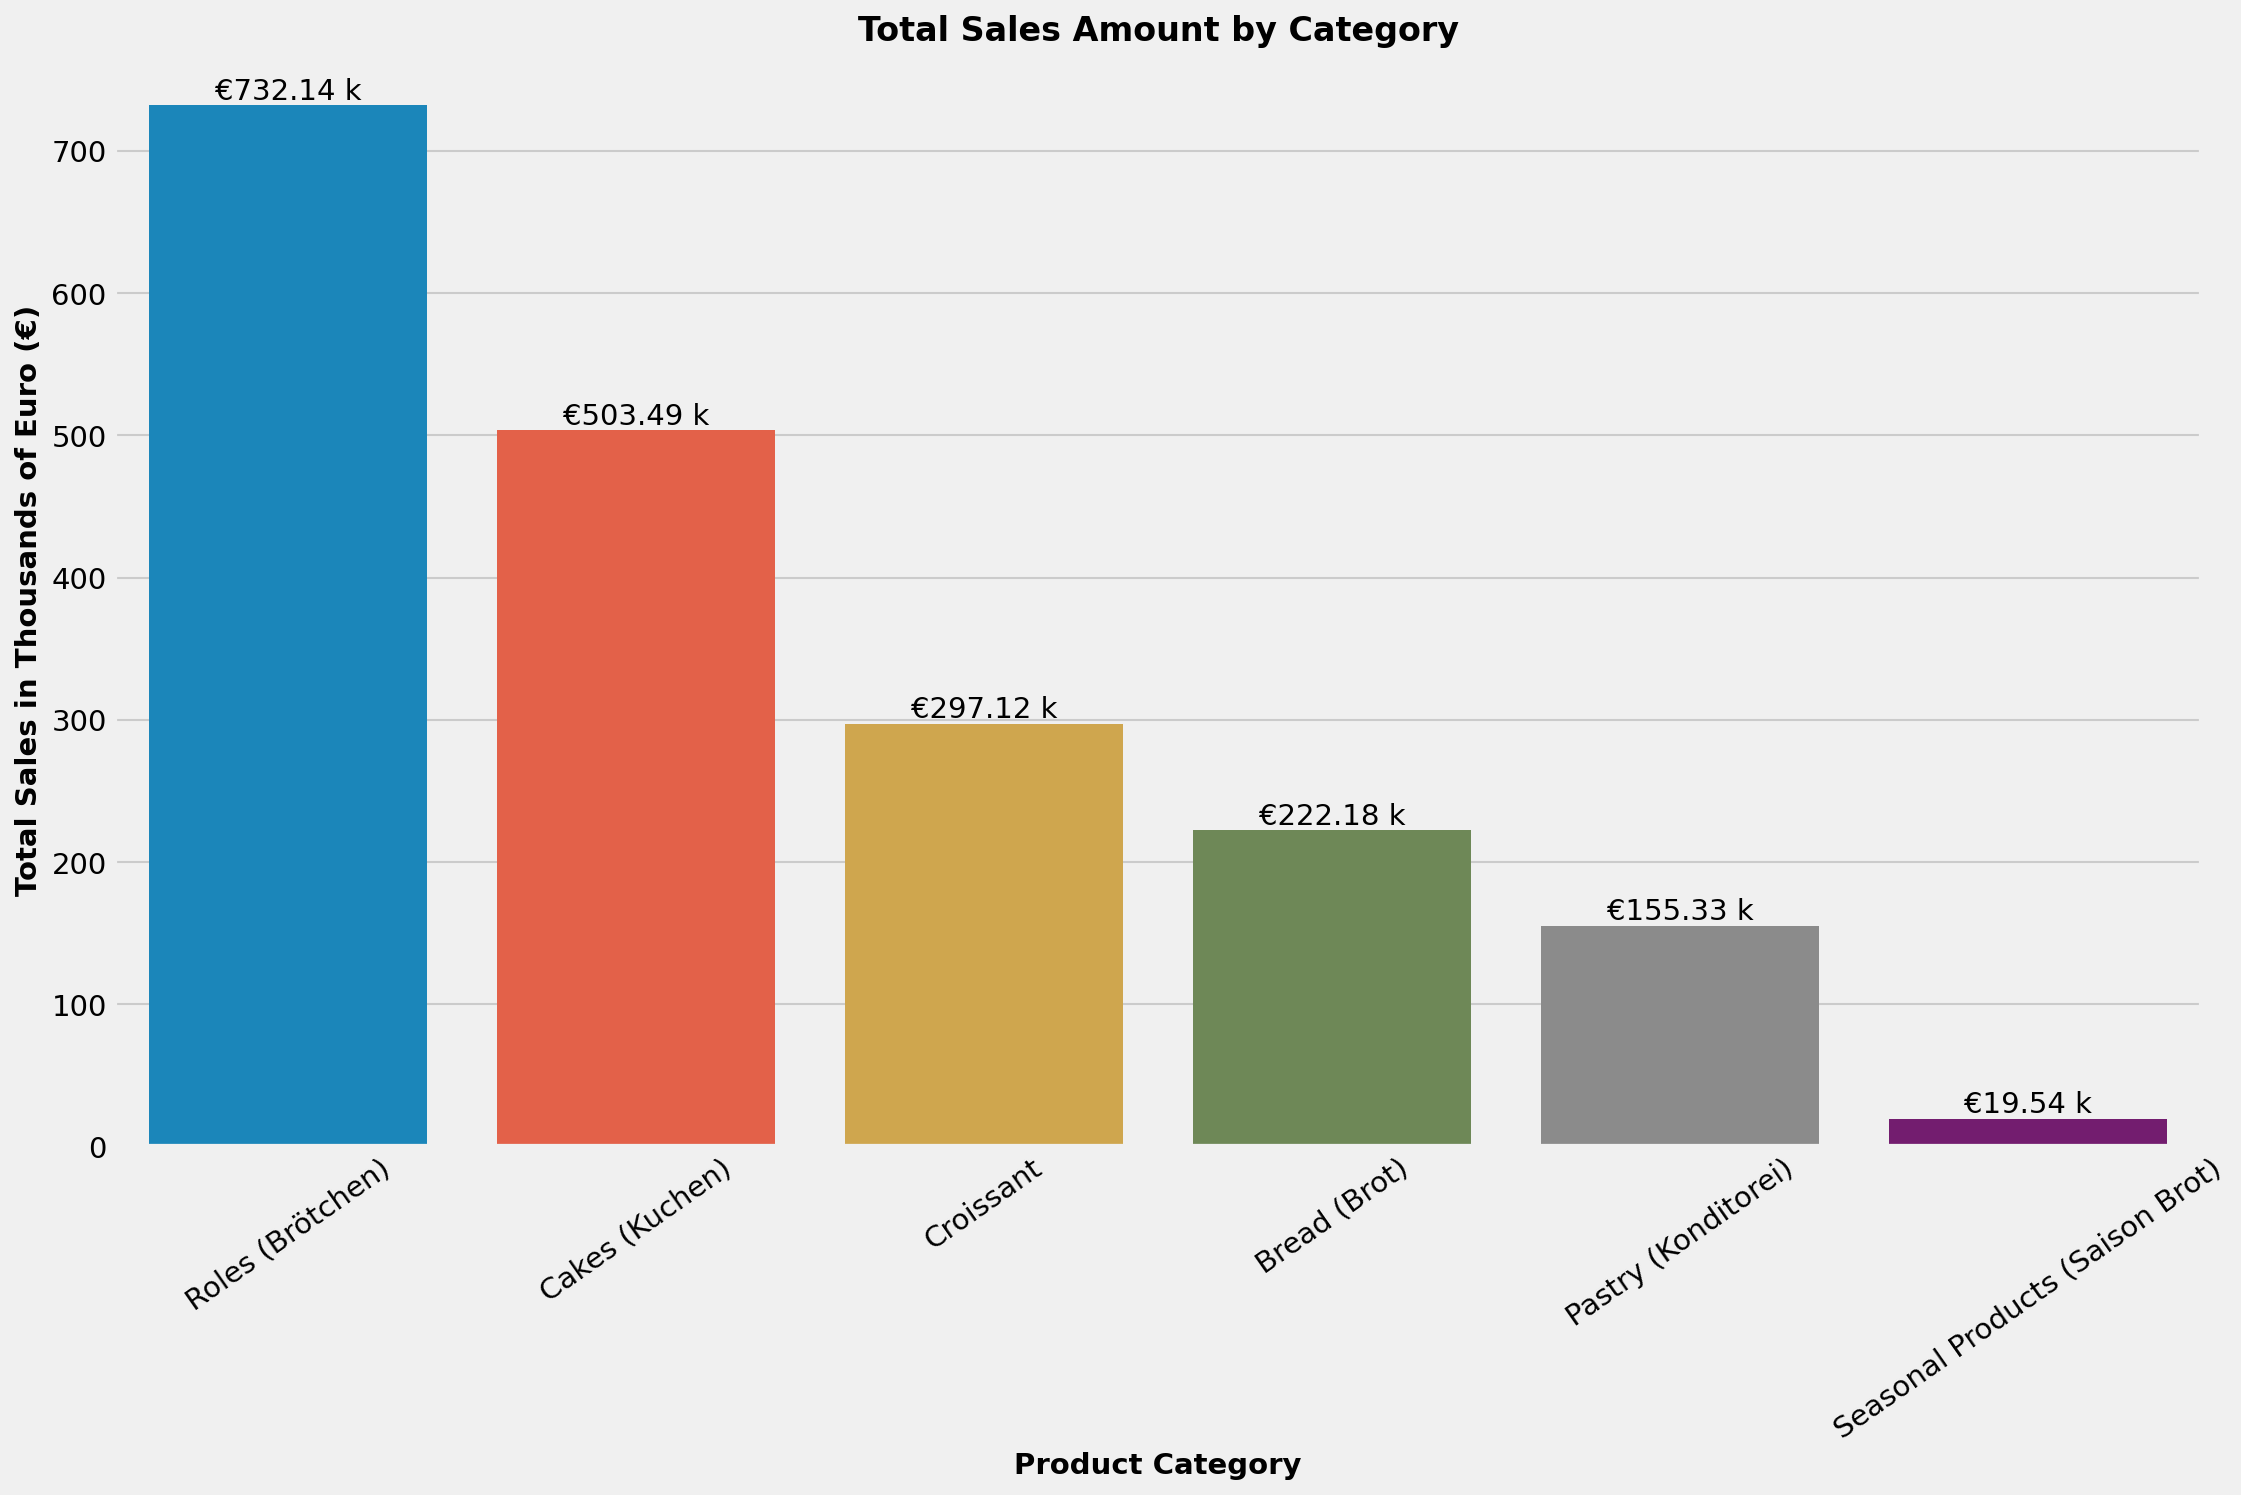

In [27]:
# ----------------- Initiating figure object -----------------
plt.figure(figsize=(16,9))
ax = sns.barplot(data = sales_by_product, x ="Product_Name", y= "Umsatz", hue= "Product_Name")

# annotation
for container in ax.containers:
    ax.bar_label(container,fmt='€%0.2f k')

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=35, ha='center')

# ----------------- Title, Labels, Legend etc ----------------
plt.title('Total Sales Amount by Category',weight='bold', fontsize=16)
plt.xlabel('Product Category', weight='bold', fontsize=14) 
plt.ylabel('Total Sales in Thousands of Euro (€)',weight='bold', fontsize=14)

plt.show()

## Top 3 Performing Products by Weekdays

In [28]:
# top 3 product categories on weekly avg sales basis

sales_by_product_weekly = df.groupby(['Weekday_Num','Weekday','Product_Name'])['Umsatz']\
                        .mean().reset_index()   # aggregation

sales_by_product_weekly = sales_by_product_weekly.sort_values(by=['Weekday_Num','Umsatz'],ascending=[True,False])  # sorting 

top3_products = sales_by_product_weekly.groupby('Weekday_Num').head(3).reset_index()  # top 3 products per weekday


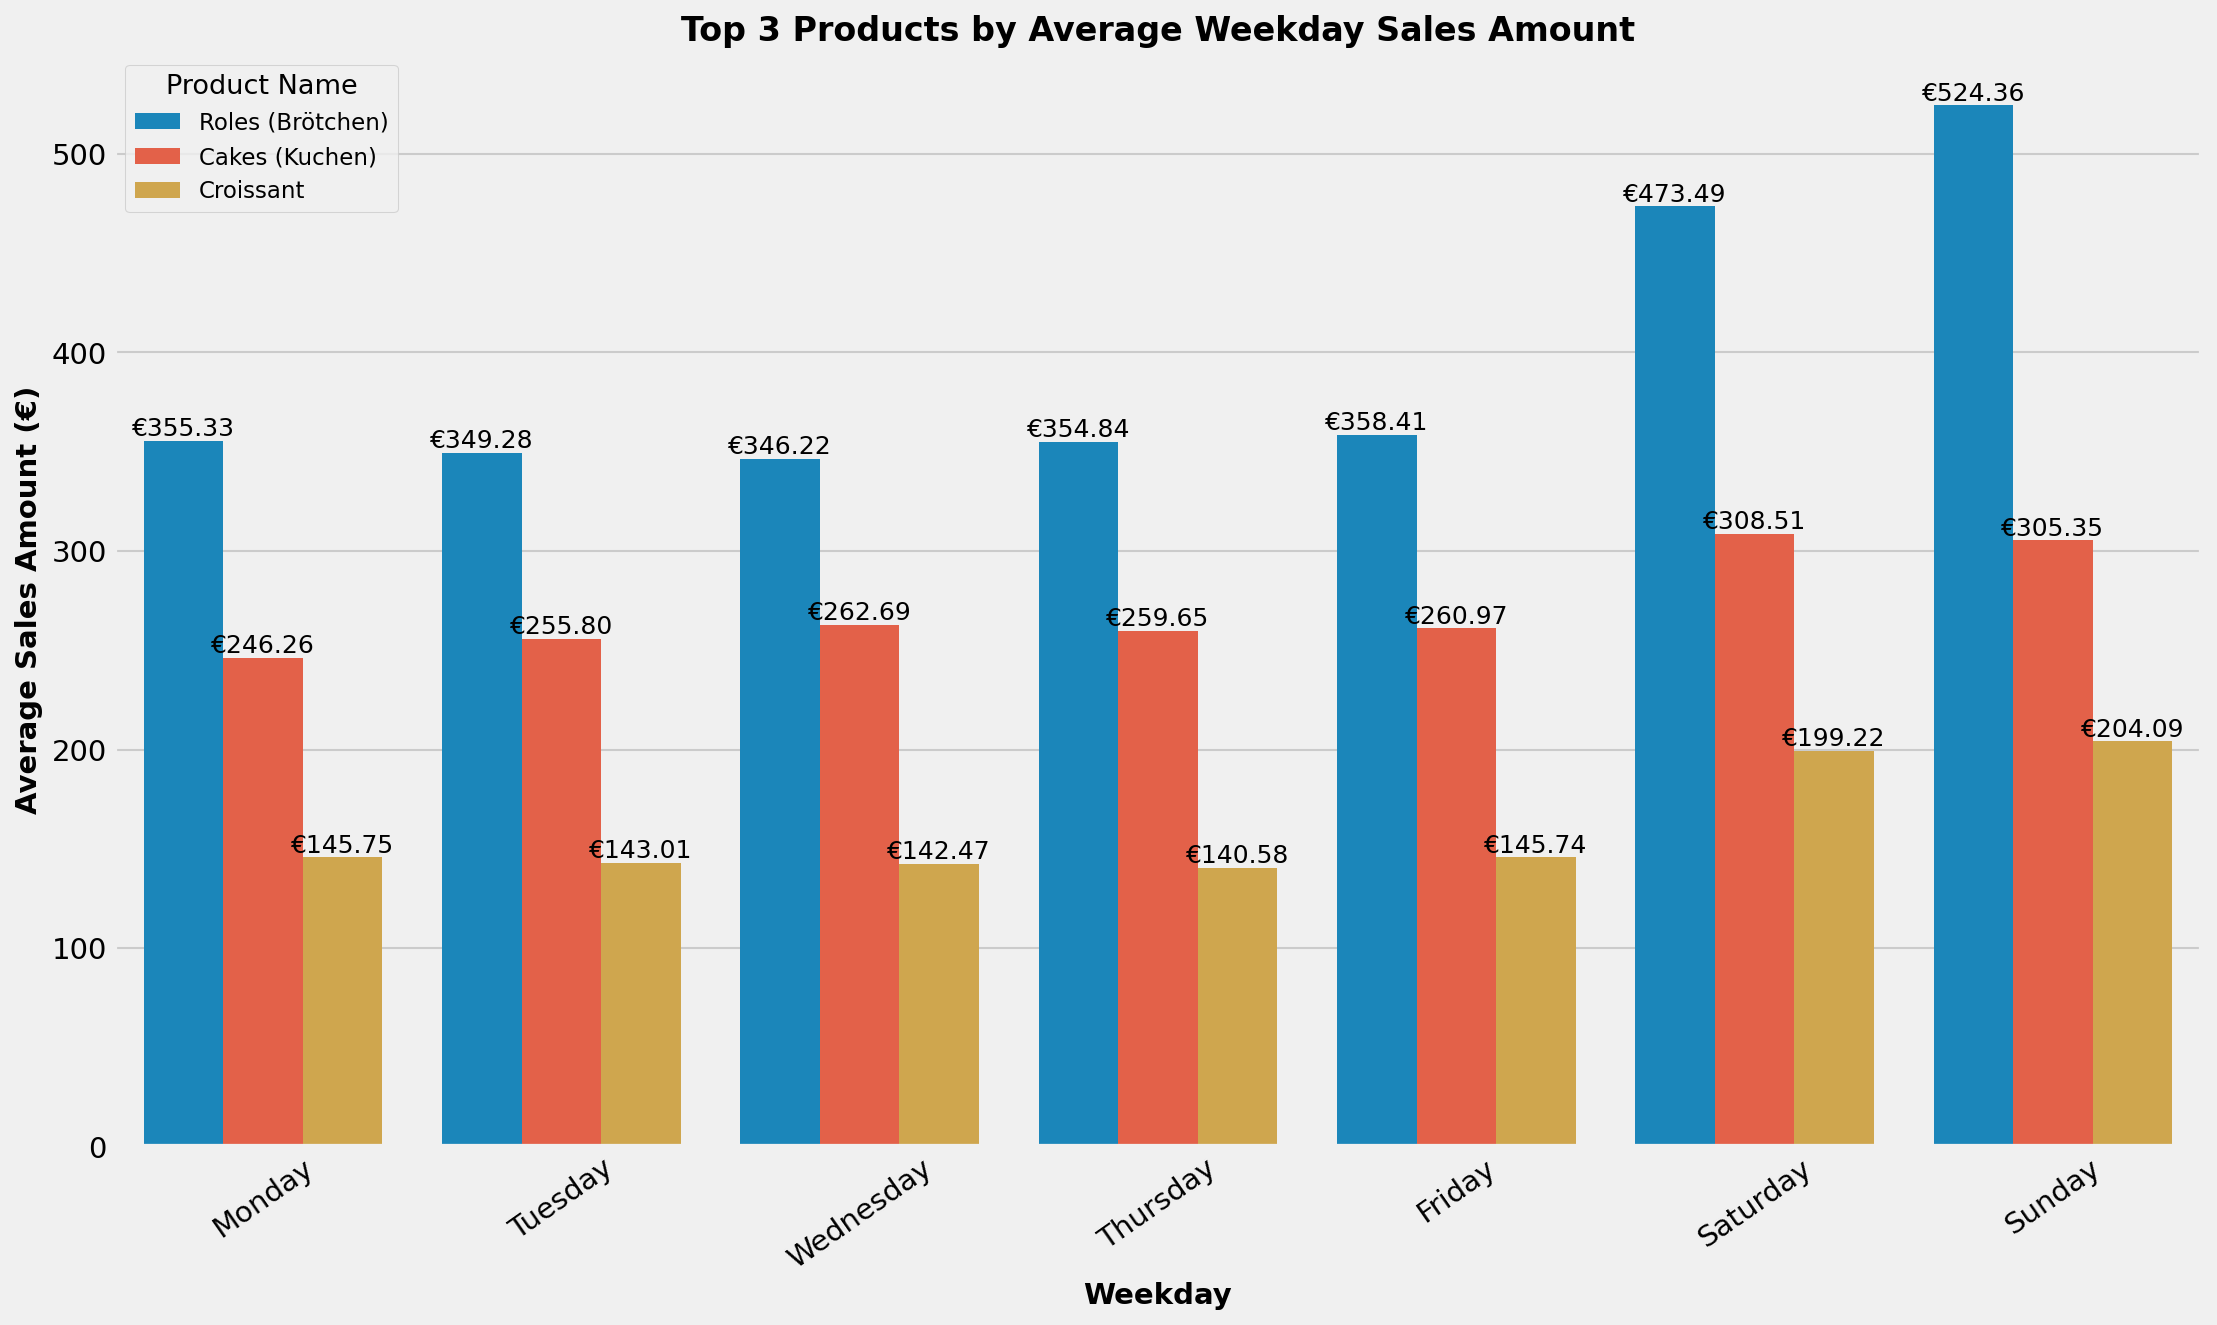

In [29]:
#plots
plt.figure(figsize=(16,9))
ax = sns.barplot(data=top3_products, x='Weekday', y='Umsatz', hue='Product_Name')

# annotation
for container in ax.containers:
    ax.bar_label(container,fmt='€%0.2f', fontsize = 12)  

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=35, ha='center')    
# ----------------- Title, Labels, Legend etc ----------------
plt.title('Top 3 Products by Average Weekday Sales Amount',weight='bold', fontsize=16)
plt.xlabel('Weekday', weight='bold', fontsize=14)           
plt.ylabel('Average Sales Amount (€)',weight='bold', fontsize=14)
plt.legend(title='Product Name', title_fontsize='13', fontsize='11', loc='upper left')
plt.show()

## Monthwise Pattern on Product Sales

In [30]:
# six different data frames one for each product

sales_by_product_monthly = df.groupby(['Month_Num','Month_Name','Product_Name'])['Umsatz']\
                        .sum().reset_index()   # aggregation

In [31]:
# unique Product anme
products = list(sales_by_product_monthly['Product_Name'].unique())

/tmp/ipykernel_2213/325392657.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["Umsatz"] = subset["Umsatz"]/1000  # converting to thousands


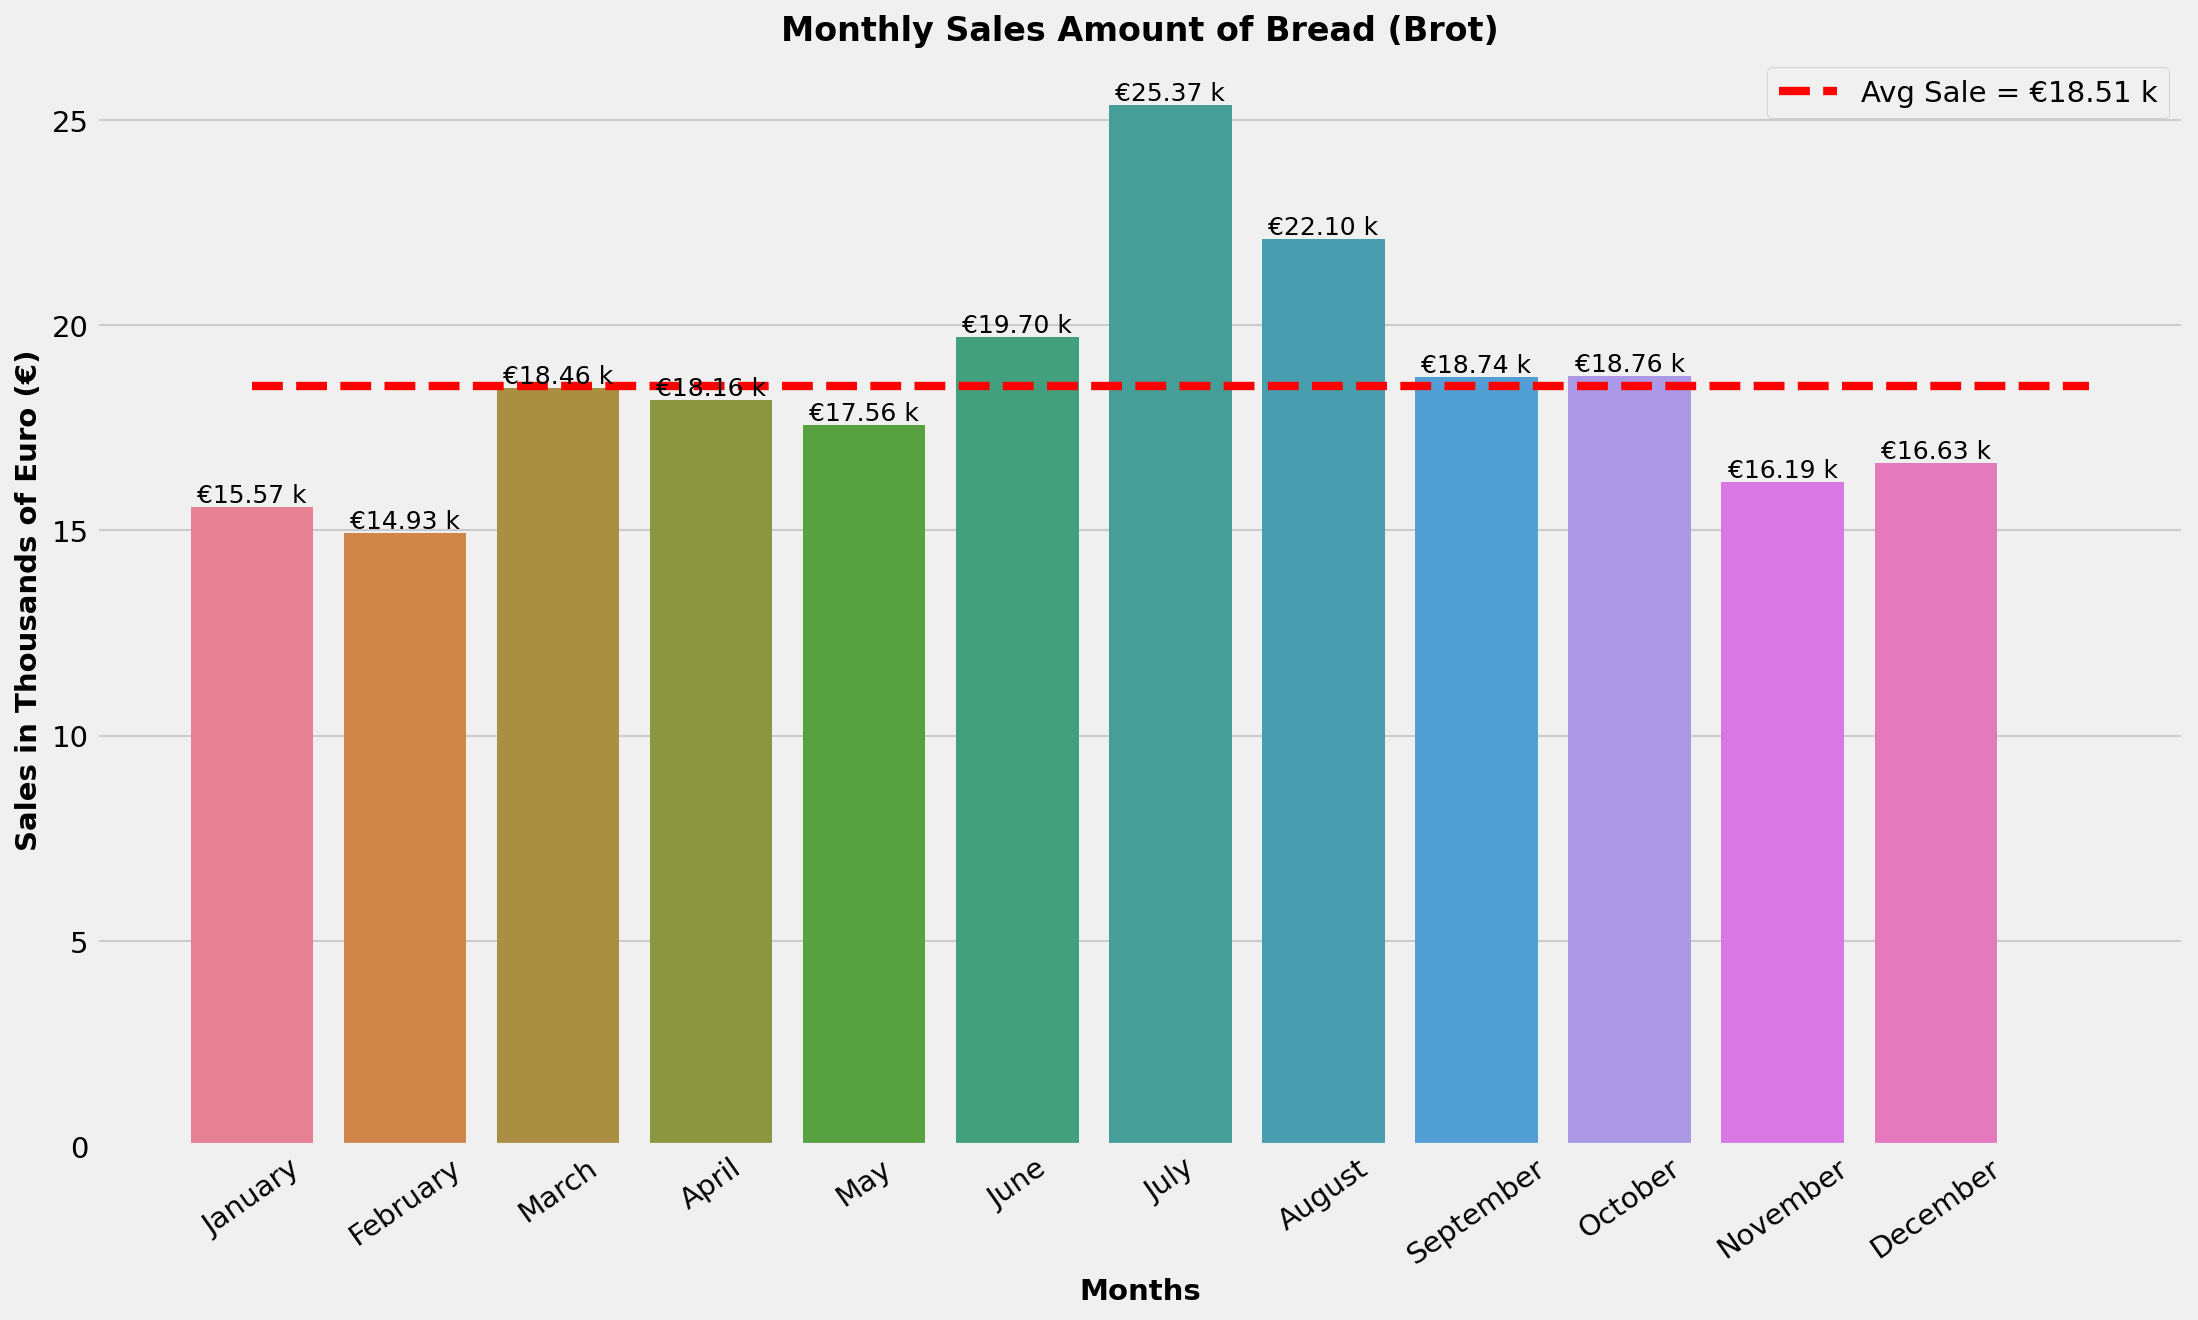

/tmp/ipykernel_2213/325392657.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["Umsatz"] = subset["Umsatz"]/1000  # converting to thousands


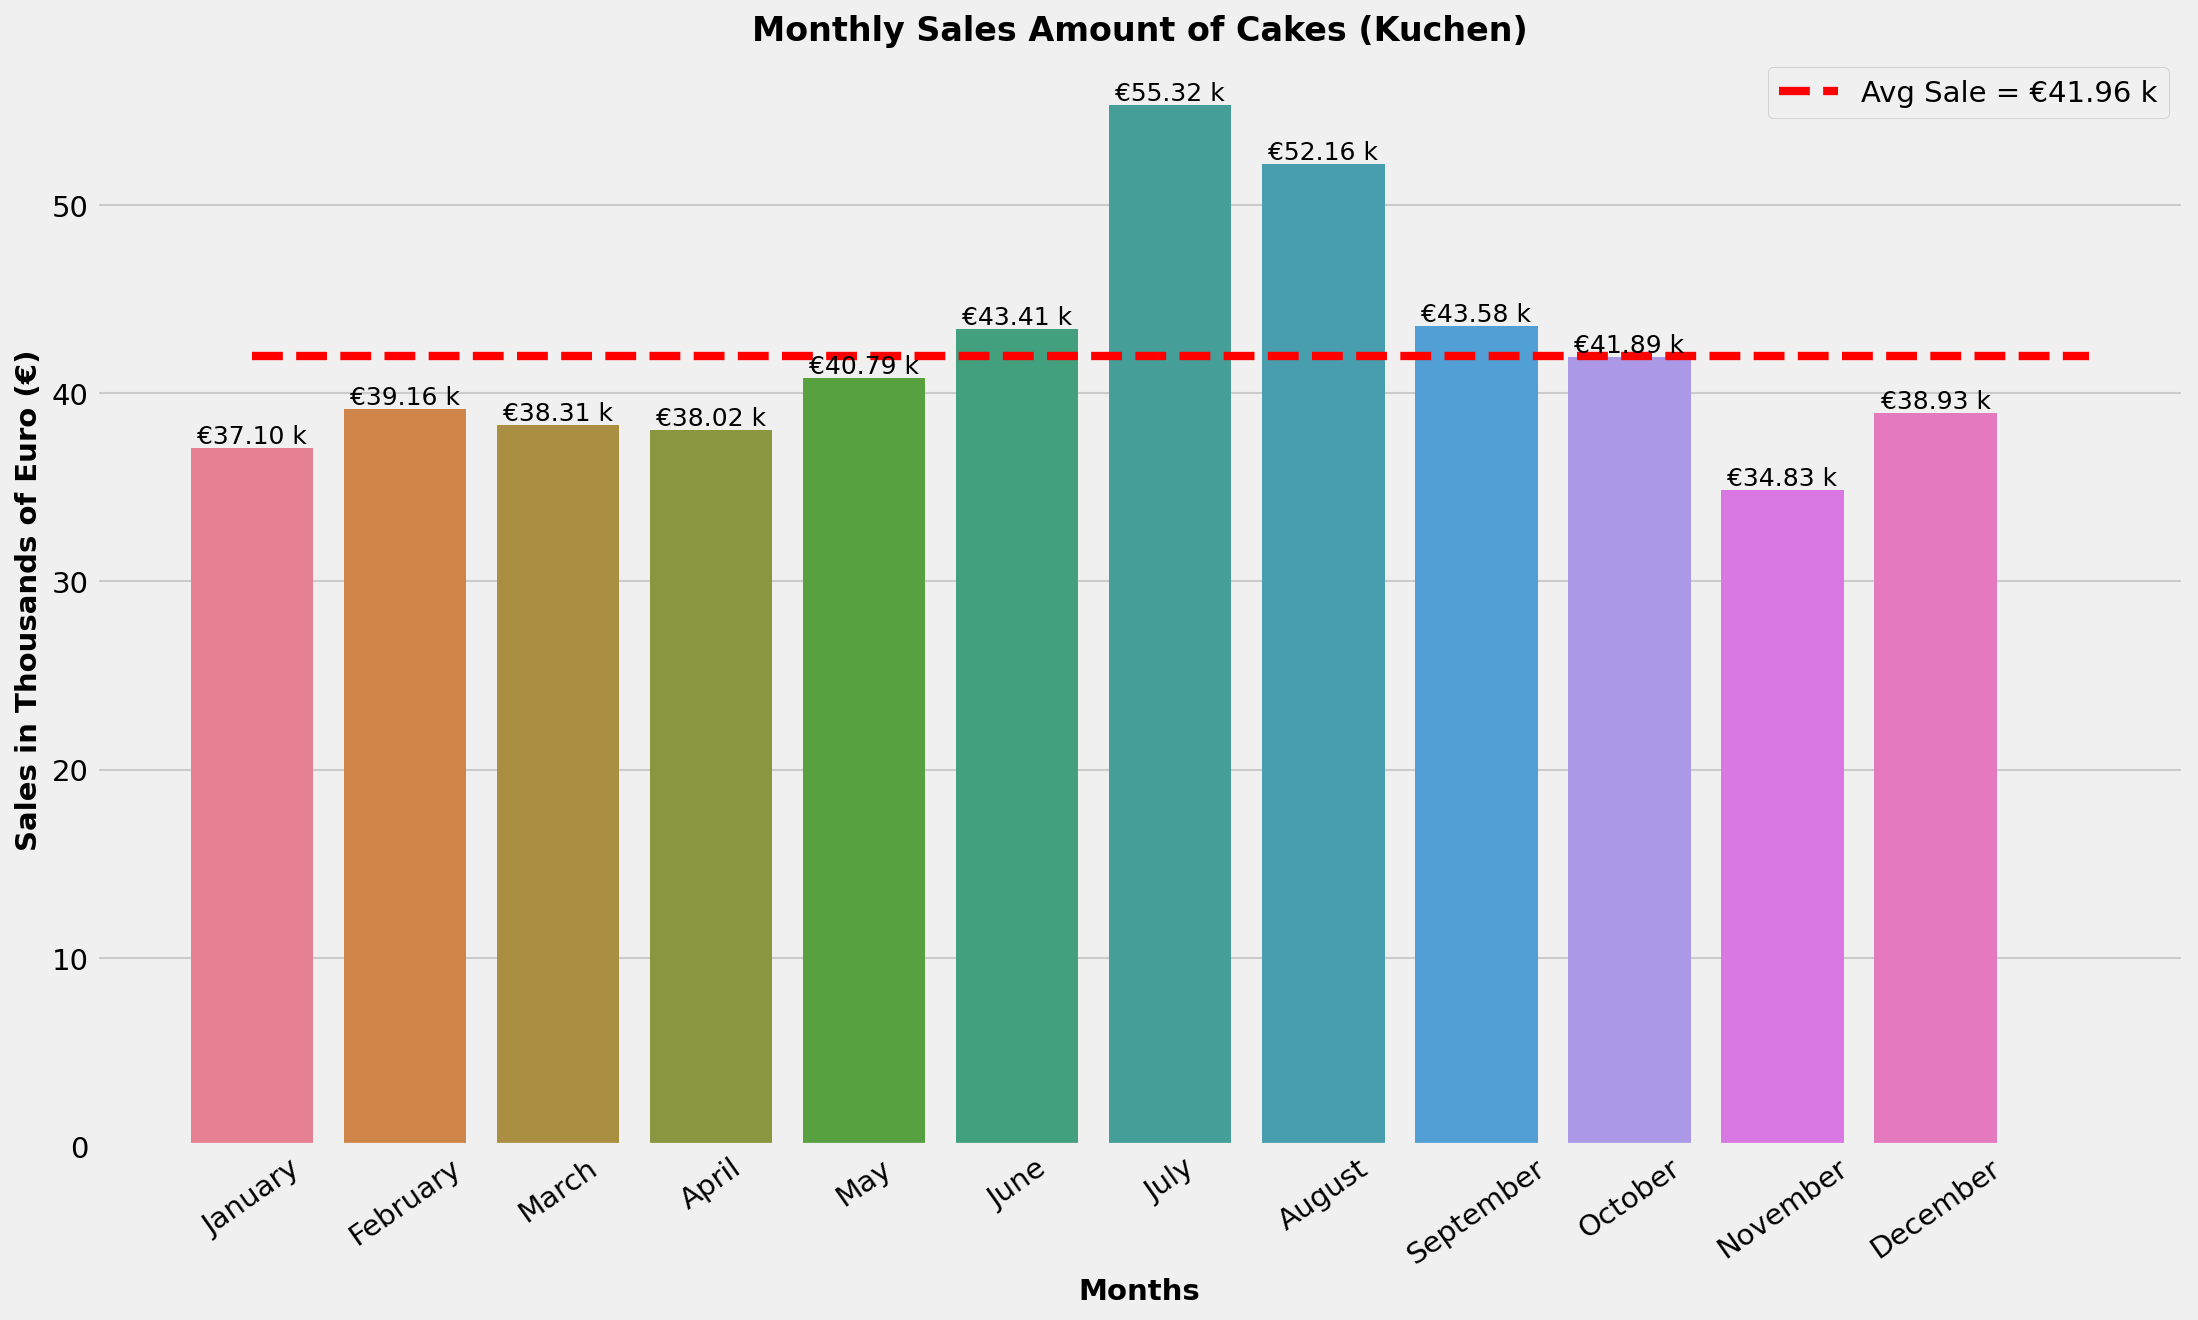

/tmp/ipykernel_2213/325392657.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["Umsatz"] = subset["Umsatz"]/1000  # converting to thousands


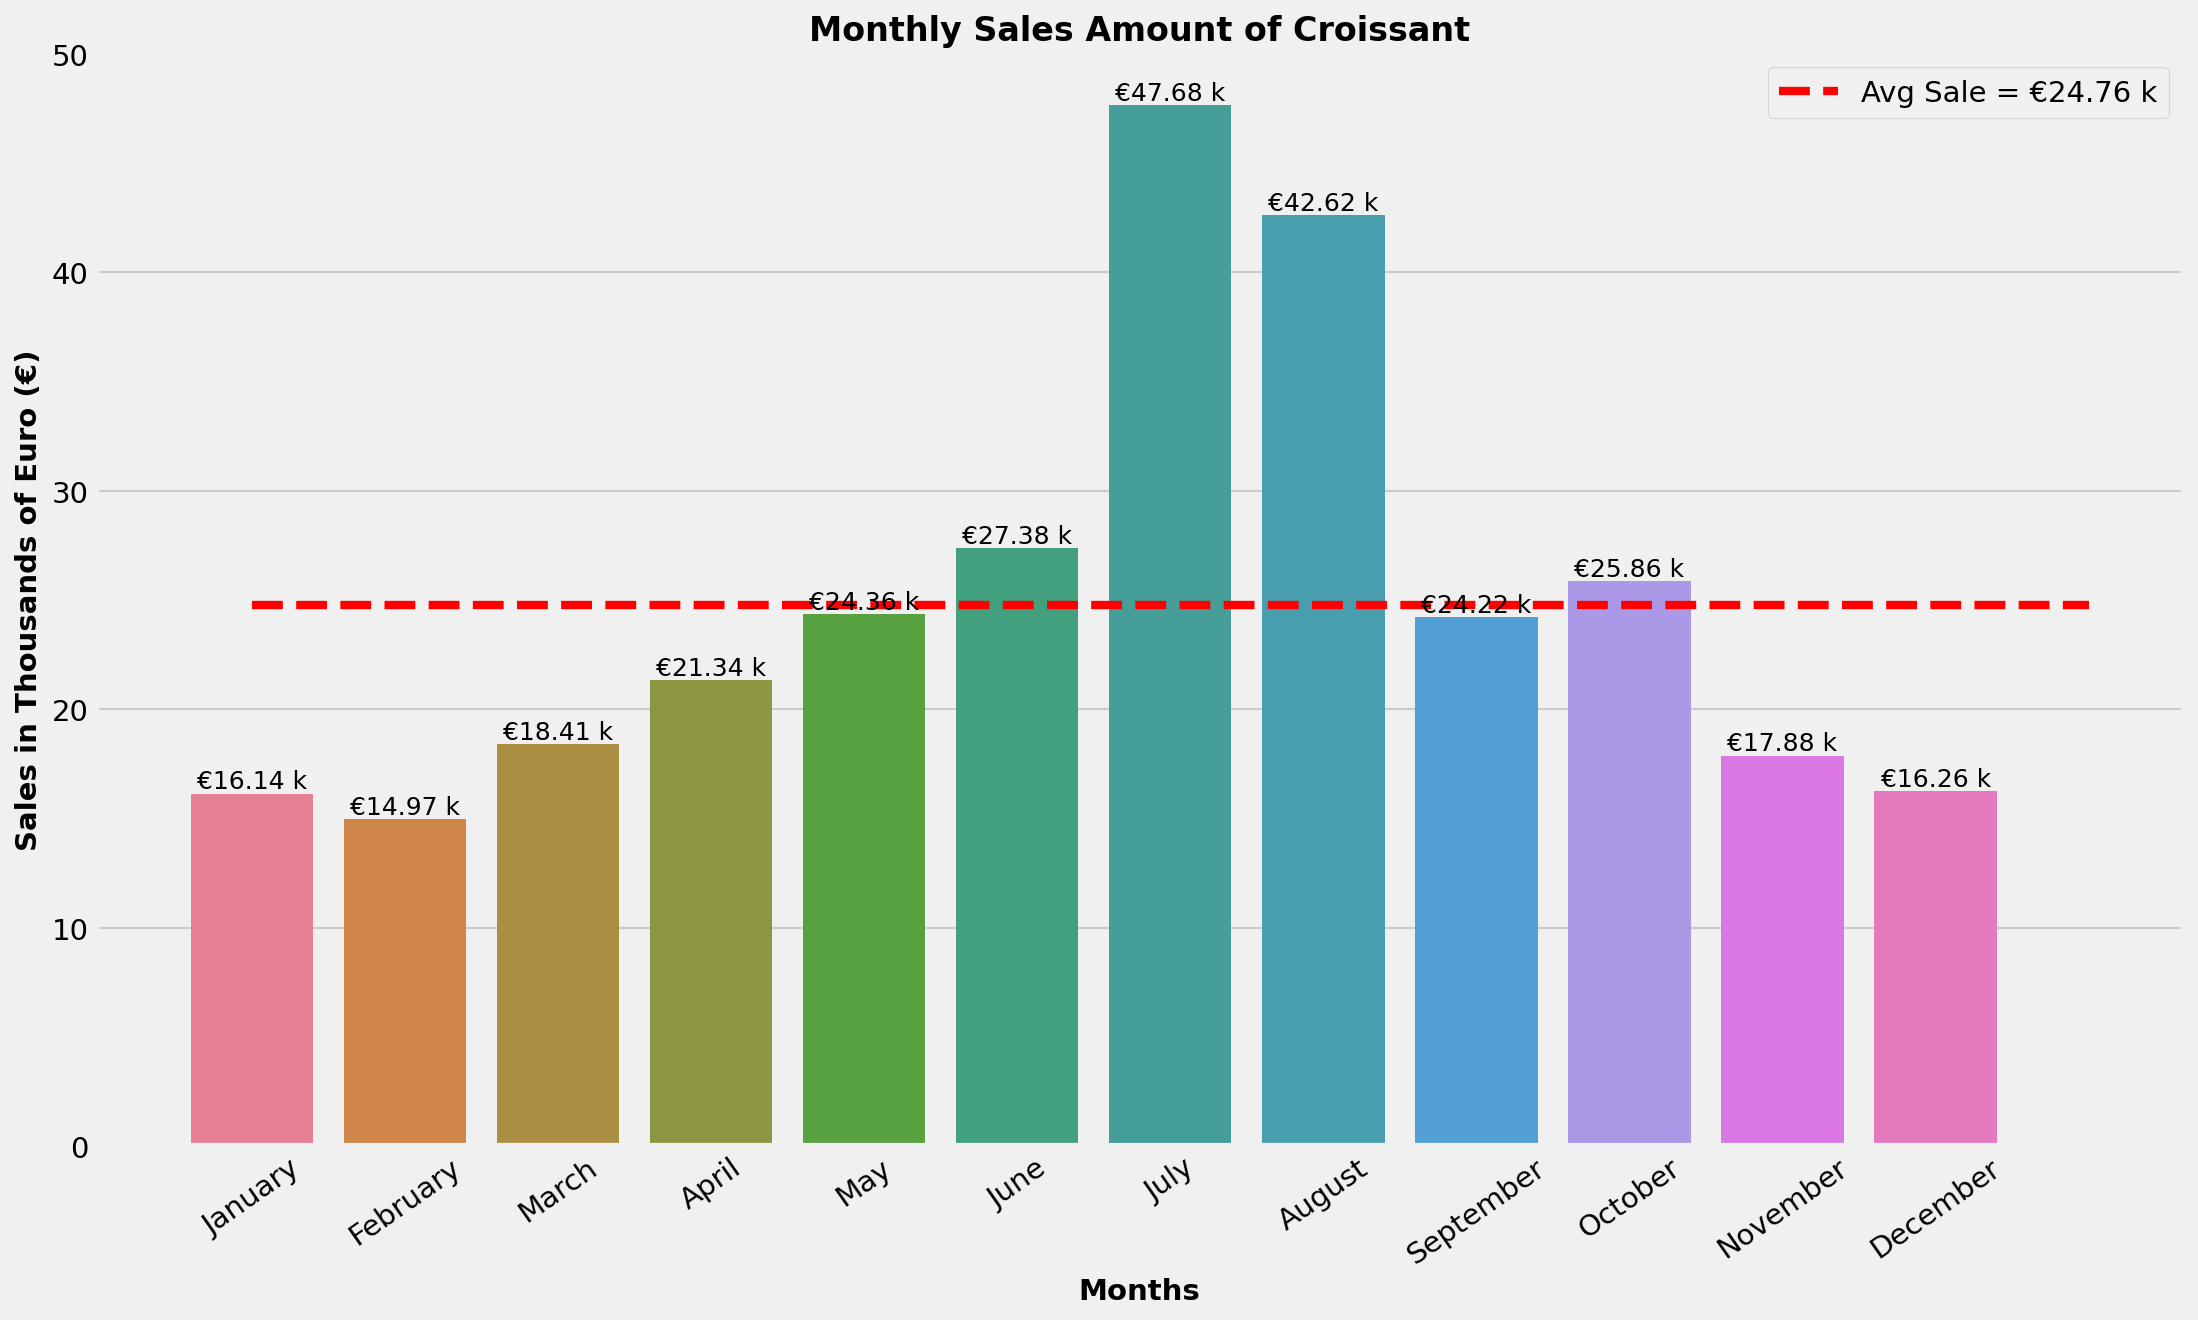

/tmp/ipykernel_2213/325392657.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["Umsatz"] = subset["Umsatz"]/1000  # converting to thousands


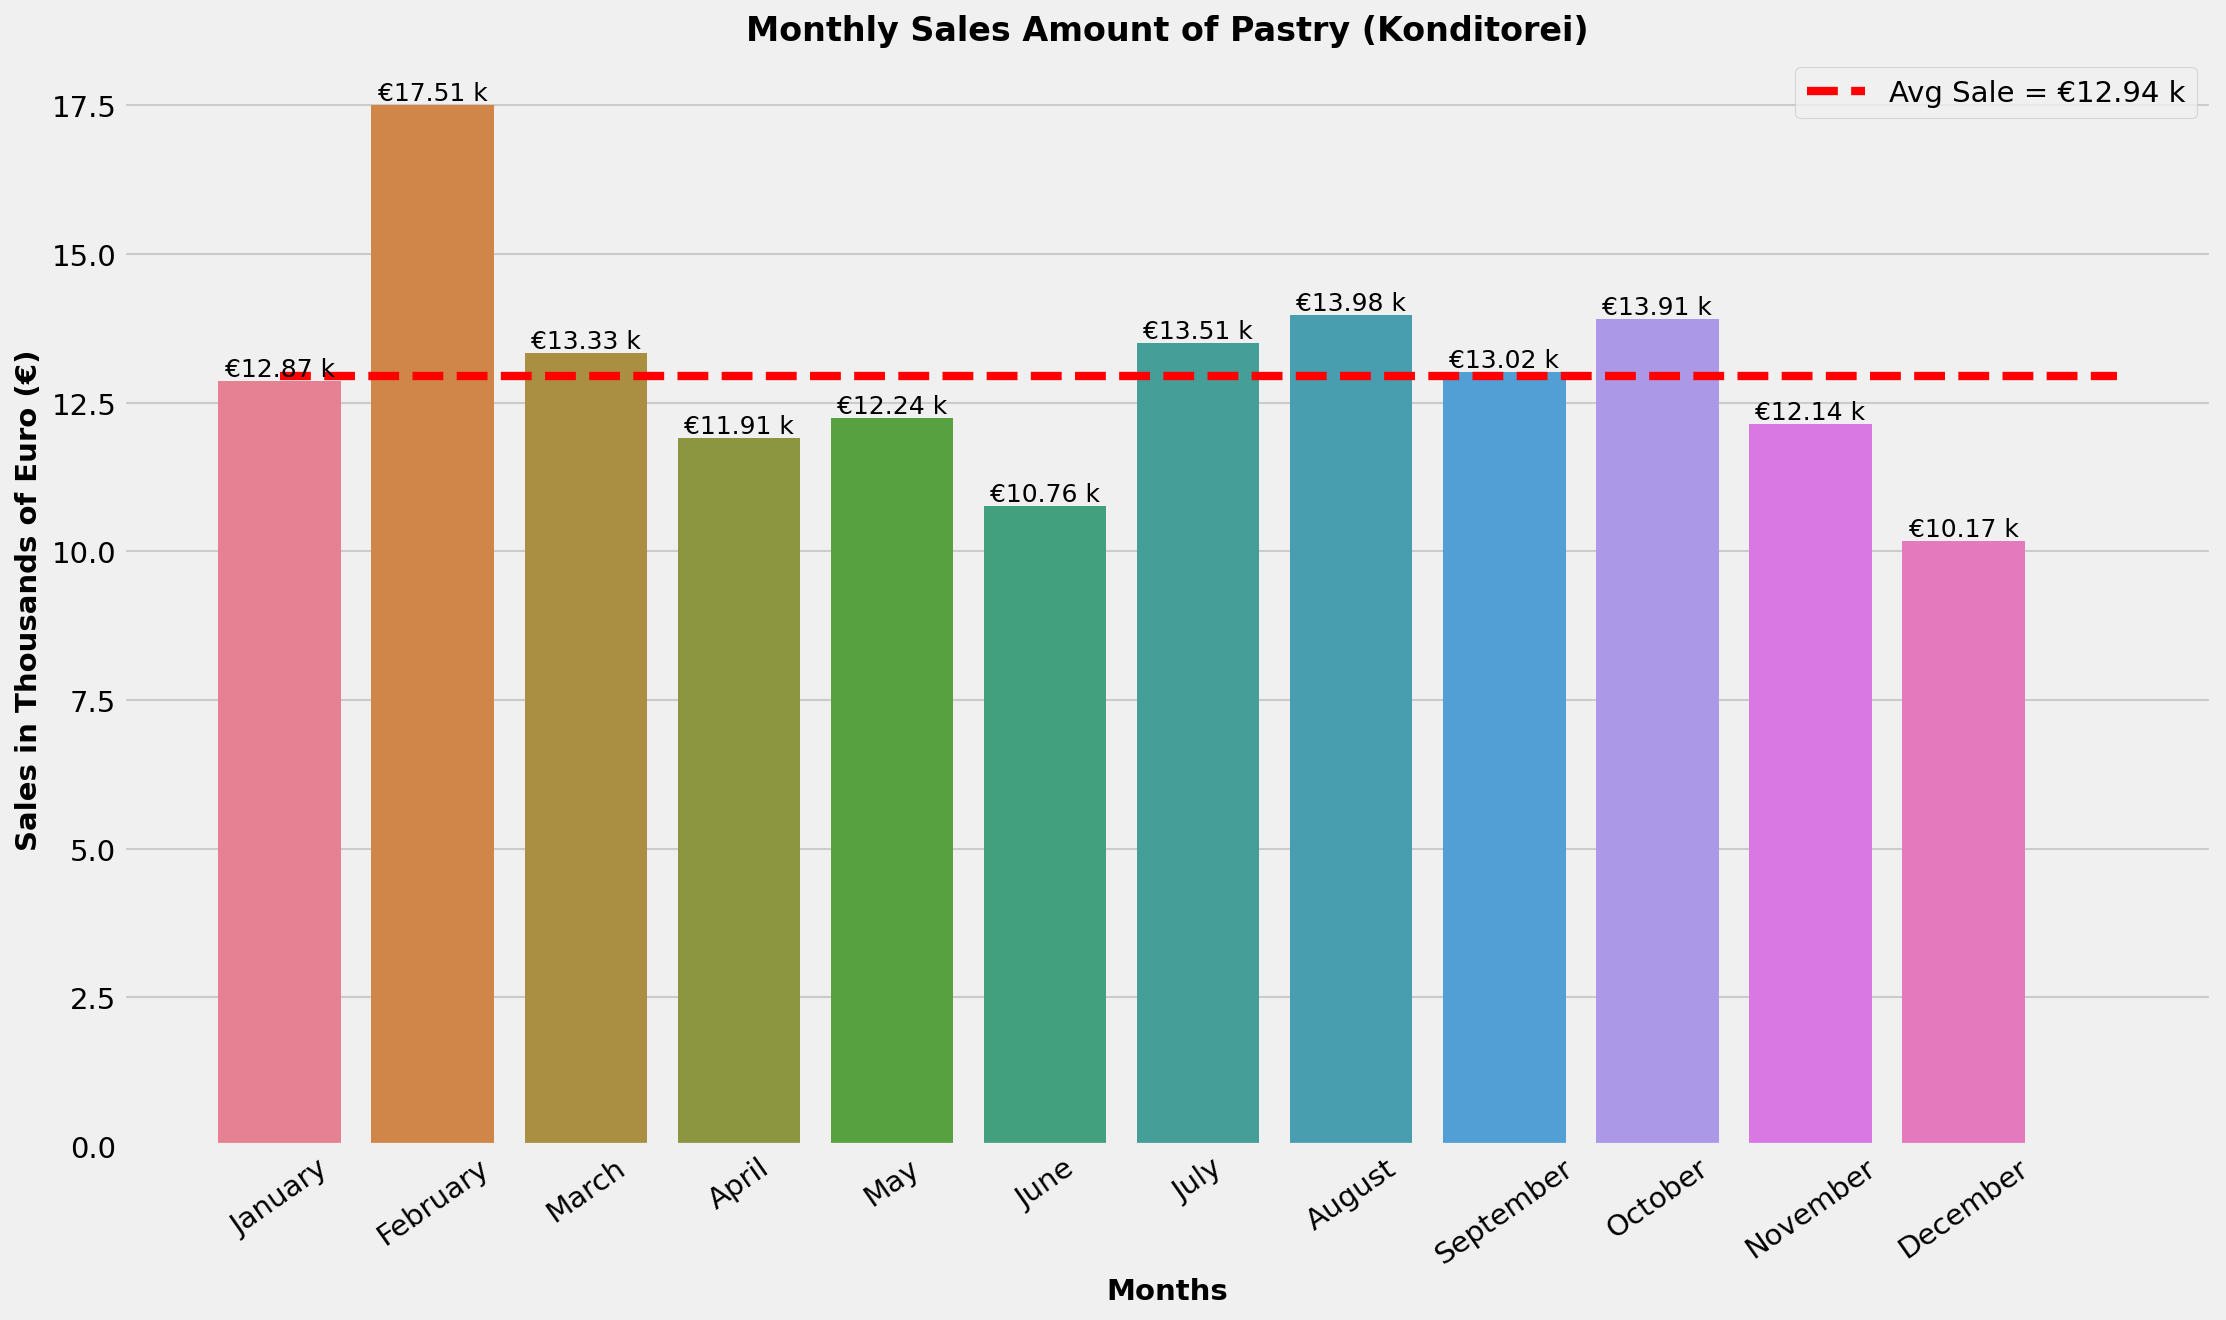

/tmp/ipykernel_2213/325392657.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["Umsatz"] = subset["Umsatz"]/1000  # converting to thousands


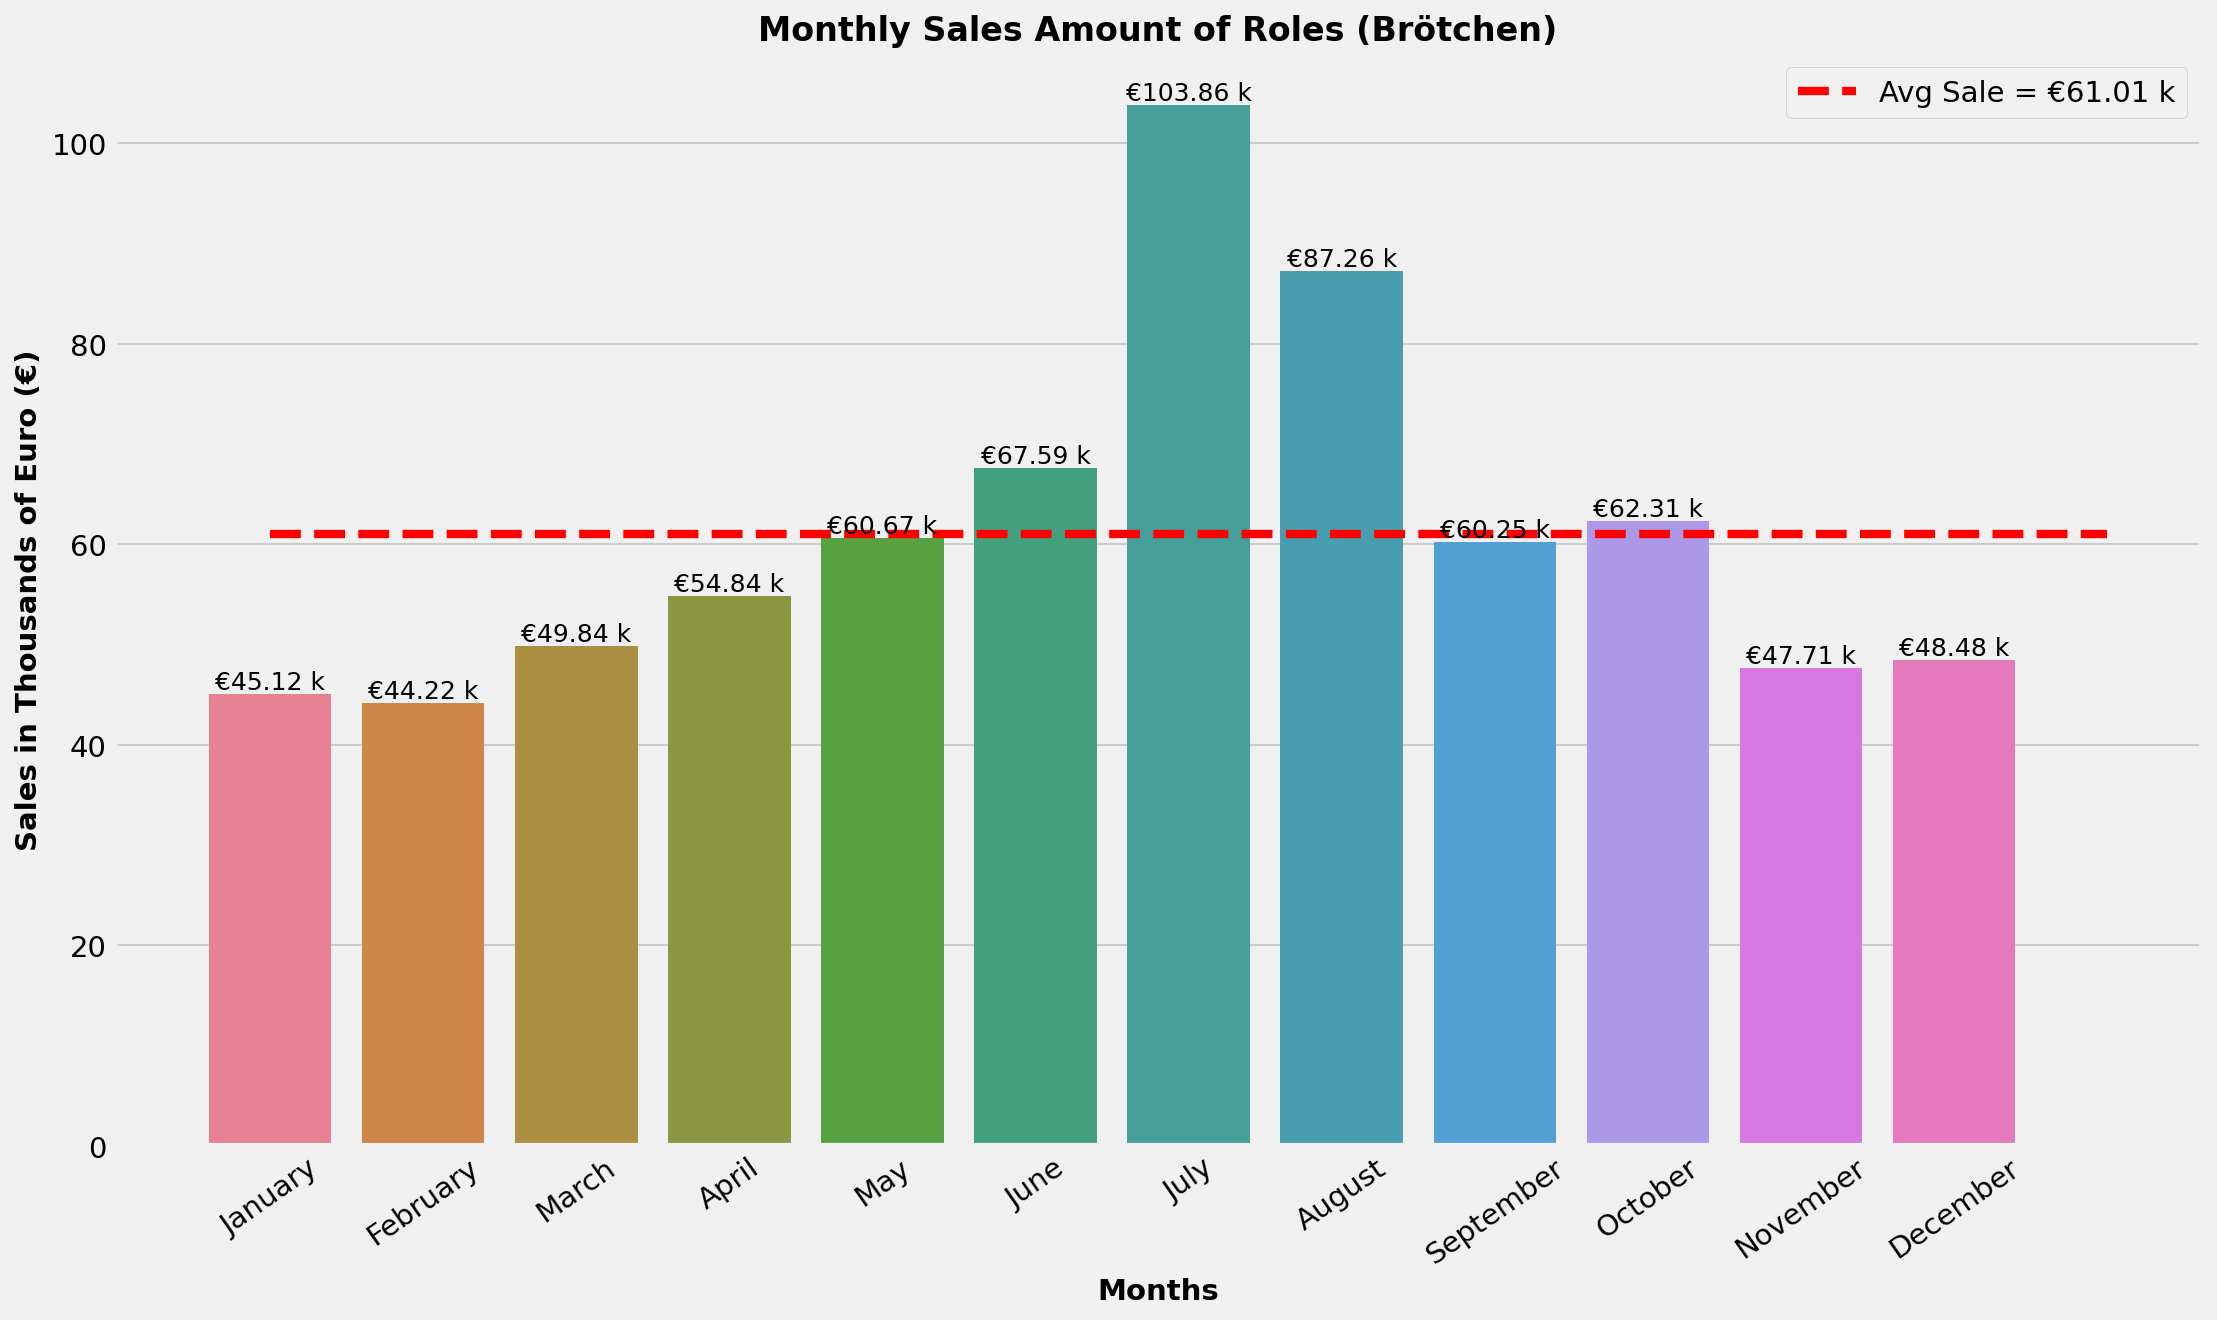

/tmp/ipykernel_2213/325392657.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["Umsatz"] = subset["Umsatz"]/1000  # converting to thousands


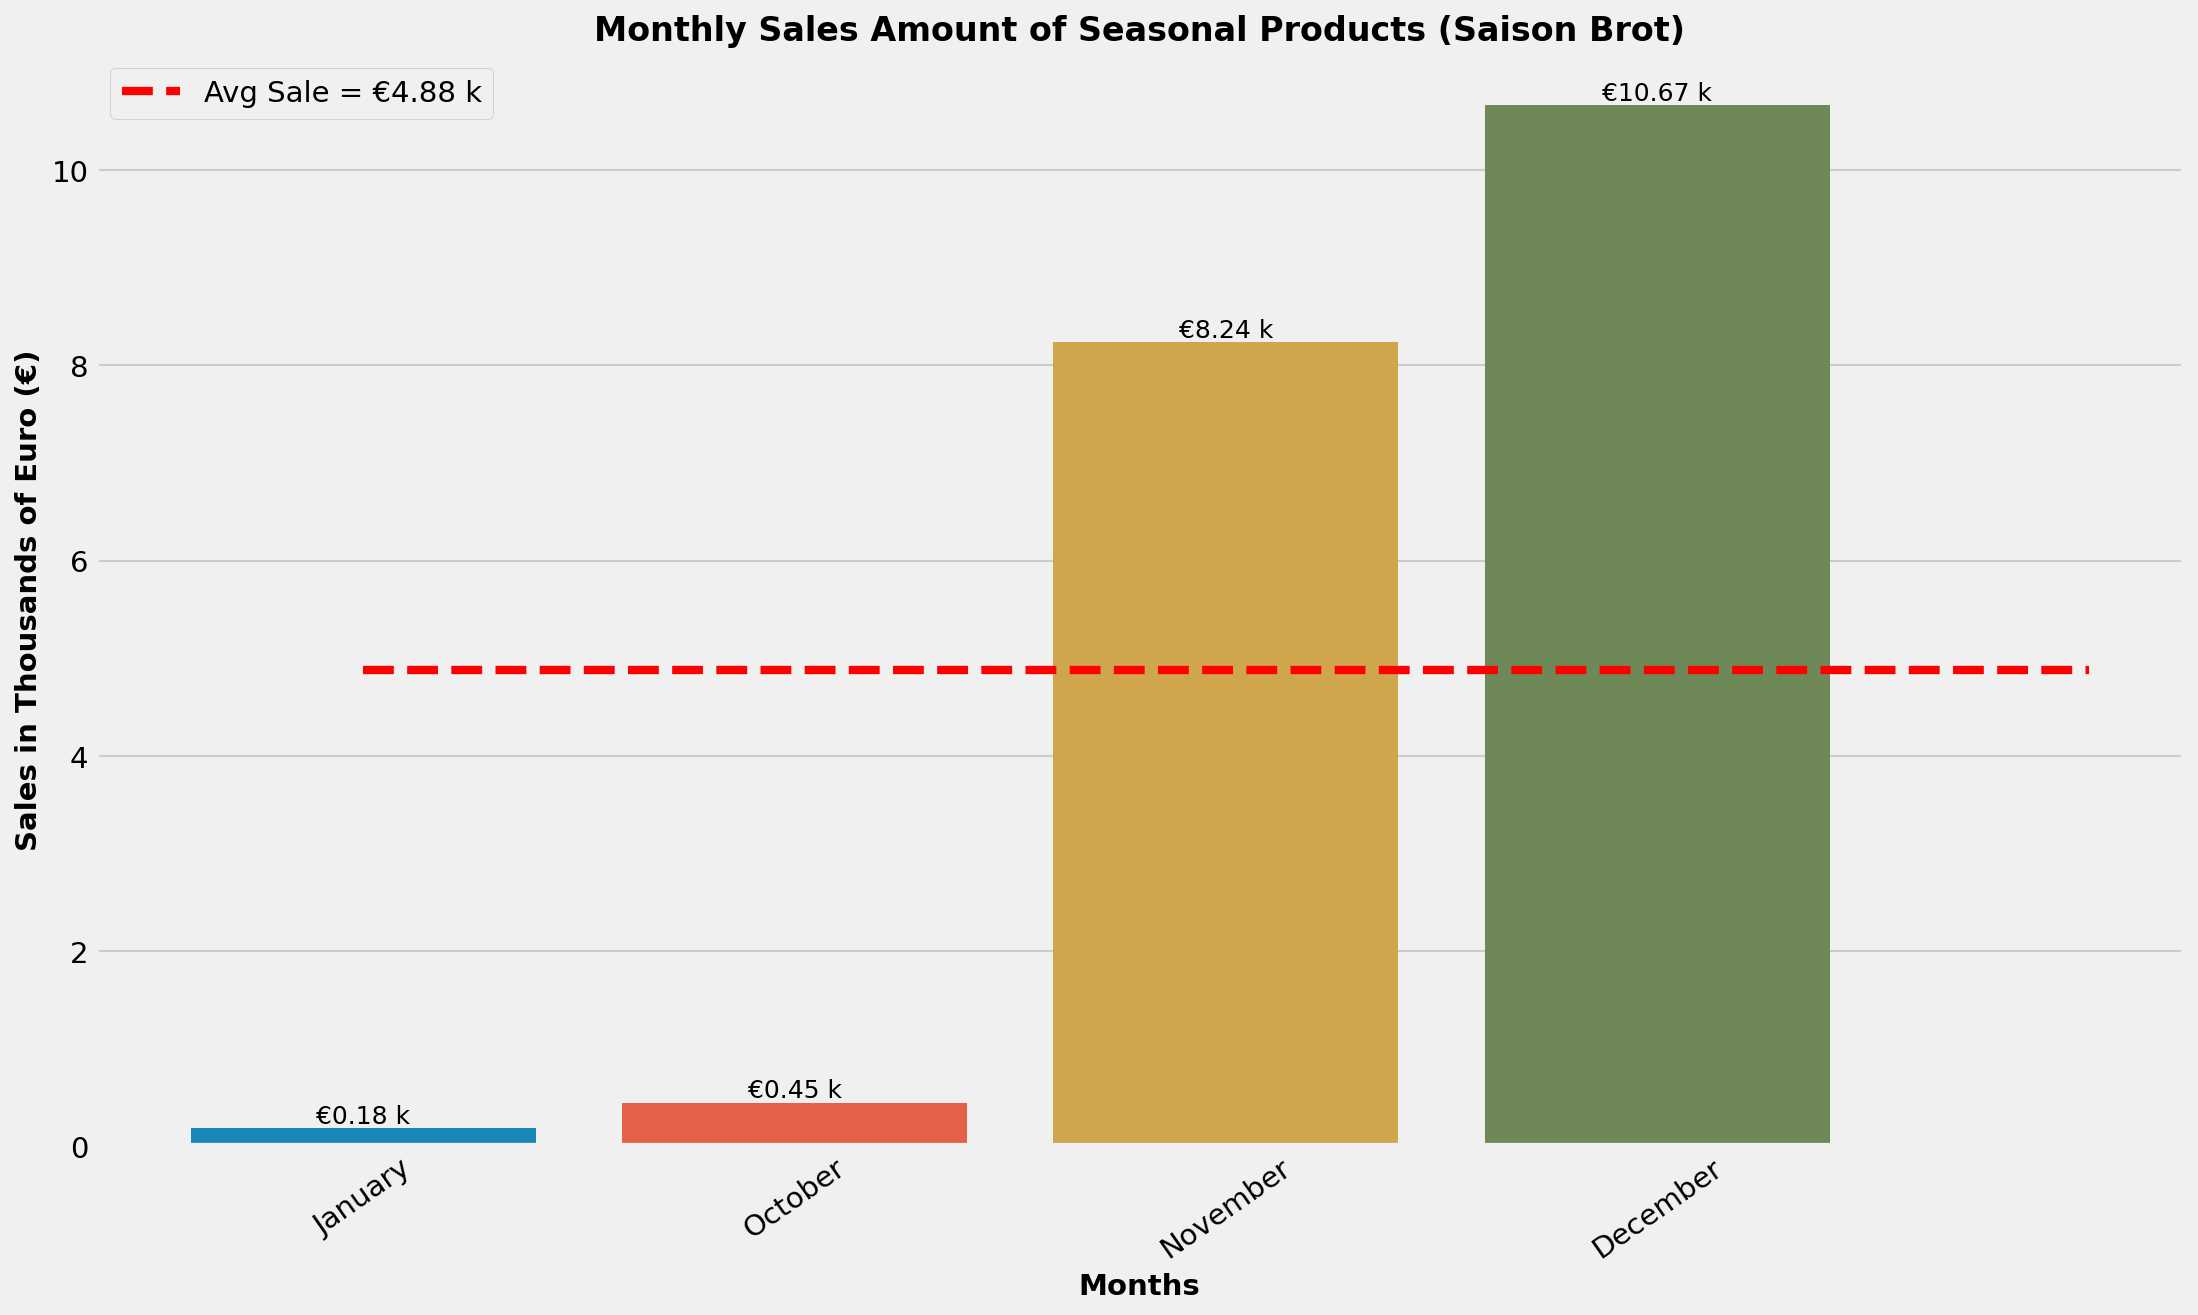

In [32]:
# running a loop to plot monthwise sales on product categories
for product in products:
    subset = sales_by_product_monthly[sales_by_product_monthly['Product_Name'] == product]    #select a single product
    subset["Umsatz"] = subset["Umsatz"]/1000  # converting to thousands

    # plotting
    plt.figure(figsize=(16,9))
    ax = sns.barplot(data = subset, x ="Month_Name", y= "Umsatz", hue= "Month_Name")

    # h-line showing avg monthly sale with annotation
    avg_monthly_sale = round(subset['Umsatz'].mean(),2)
    ax.hlines(y=avg_monthly_sale, xmin=0, xmax=len(subset), color='r', linestyles='--',label=f'Avg Sale = €{avg_monthly_sale} k')
    ax.legend(loc='best')

    # annotation of bars
    for container in ax.containers:
        ax.bar_label(container,fmt='€%0.2f k', fontsize = 12)  

    # Rotate x-axis labels to prevent overlap
    plt.xticks(rotation=35, ha='center')

    # ----------------- Title, Labels, Legend etc ----------------
    plt.title(f'Monthly Sales Amount of {product}',weight='bold', fontsize=16)
    plt.xlabel('Months', weight='bold', fontsize=14) 
    plt.ylabel('Sales in Thousands of Euro (€)',weight='bold', fontsize=14)

    plt.show()

    

### Comment

So we can make the following comment about the sales pattern of various products.

- Brot sales reaches its peak in Summer (Jul and Aug)
- Same is true for Kuchen
- Croissant sales has the same pattern, but the peak on July is significant here, almost twice its average value (96% increase).
- Konditorei sales has a peak on February, for rest of the year the sales stays close to its average value
- Brötchen sales has a peak in July. This is also significant - almost 70% higher than its monthly average sales value. 
- Saisonbrot is only sold for 4 months - October, November, December and January. However the significant sales only happens in two months November and December.